In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
#from mpl_toolkits.basemap import Basemap
%matplotlib inline
import plotly.express as px
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
from io import StringIO
import geopandas as gpd
from shapely.geometry import Point
import geoplot

In [150]:
response = requests.get('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

In [151]:
type(response)

requests.models.Response

In [152]:
response.status_code

200

In [153]:
soup = BS(response.text, 'html.parser')

In [154]:
#print(soup.prettify())

In [155]:
soup.find('title').text

'List of deadly earthquakes since 1900 - Wikipedia'

In [156]:
#soup.findAll('table')

In [157]:
soup.find('table', attrs={'class' : 'wikitable'})

<table class="sortable wikitable">
<tbody><tr bgcolor="#CCCCCC">
<th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
<th width="33%">Present-day country and link to Wikipedia article</th>
<th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
<th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
<th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
<th width="6%">Magnitude</th>
<th width="9%">Secondary Effects</th>
<th width="10%">PDE Shaking Deaths</th>
<th width="10%">PDE Total Deaths</th>
<th width="10%">Utsu Total Deaths</th>
<th width="10%">EM-DAT Total Deaths</th>
<th width="12%">Other Source Deaths
</th></tr>
<tr>
<td>1900-05-11 17:23</td>
<td>Japan</td>
<td>38.700</td>
<td>141.100</td>
<td>5</td>
<td>7.0 <a href="/wiki/Seismic_magnitude_scales#Mjma" title="Seismic magnitude scales"><span class="rt-commentedText" title="JMA mag.">M<sub>JMA</sub></span></a></td>
<td></td>
<td>

In [158]:
table_html = str(soup.find('table', attrs={'class' : 'wikitable'}))

from IPython.core.display import HTML

HTML(table_html)

Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,
1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,
1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,
1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,
1901-03-31 07:11,Bulgaria,43.400,28.700,,6.4 Muk,,,,4,,
1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,,,,,
1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,,,,1,,
1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,,,,1,,
1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,,,,86,,
1902-03-09 07:46,Turkey,40.700,33.600,,5.5 Muk,,,,4,,


In [159]:
tables = pd.read_html(table_html)

In [160]:
#tables

In [161]:
type(tables)

list

In [162]:
earthquake_table= tables[0]

In [163]:
earthquake_table.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN


In [164]:
list(earthquake_table.columns) 

['Origin (UTC)',
 'Present-day country and link to Wikipedia article',
 'Lat',
 'Long',
 'Depth (km)',
 'Magnitude',
 'Secondary Effects',
 'PDE Shaking Deaths',
 'PDE Total Deaths',
 'Utsu Total Deaths',
 'EM-DAT Total Deaths',
 'Other Source Deaths']

In [165]:
#Replace empty strings with NaN
#earthquake_table= earthquake_table.replace(r'^\s*$', np.nan, regex=True)

In [166]:
earthquake_table.describe()

,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths
count,738.000000,749.000000,1027.000000
mean,1506.390244,2019.323097,1580.013632
std,24589.605189,26877.253336,12620.035353
min,0.000000,0.000000,1.000000
25%,1.000000,1.000000,2.000000
50%,3.000000,4.000000,11.000000
75%,16.750000,24.000000,103.000000
max,655237.000000,655237.000000,242800.000000


In [167]:
earthquake_table.tail()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1335,2011-03-24 20:25,Burma (see 2011 Burma earthquake),NaN,NaN,NaN,6.8 Mw,NaN,NaN,NaN,NaN,NaN,150+
1336,2011-04-07 14:32,Japan (see April 2011 Miyagi earthquake),38.2,140.0,66.0,7.1 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1337,2011-09-18 12:40,India (see 2011 Sikkim earthquake),27.723,88.064,19.7,6.9 Mw,L,NaN,NaN,NaN,NaN,111+
1338,2011-09-23 10:41,Turkey (see 2011 Van earthquake),38.6,43.5,7.2,7.1 Mw,NaN,NaN,NaN,NaN,NaN,"601 (as of October 30, 2011)"
1339,2018-08-05 19:46,Indonesia (see Lombok earthquake),NaN,NaN,31.0,6.9 Mw,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
#earthquake_table.info

In [169]:
#earthquake_table.isnull()

In [170]:
# Saving DF
earthquake_table.to_csv('data/earthquake_table.csv',index=None)

In [171]:
earthquake_df=pd.read_csv('data/earthquake_table.csv')

In [172]:
list(earthquake_df.columns) 

['Origin (UTC)',
 'Present-day country and link to Wikipedia article',
 'Lat',
 'Long',
 'Depth (km)',
 'Magnitude',
 'Secondary Effects',
 'PDE Shaking Deaths',
 'PDE Total Deaths',
 'Utsu Total Deaths',
 'EM-DAT Total Deaths',
 'Other Source Deaths']

In [173]:
#add underscore to empty spaces in column headers
earthquake_df.columns=earthquake_df.columns.str.replace(' ','_')

In [174]:
list(earthquake_df.columns) 

['Origin_(UTC)',
 'Present-day_country_and_link_to_Wikipedia_article',
 'Lat',
 'Long',
 'Depth_(km)',
 'Magnitude',
 'Secondary_Effects',
 'PDE_Shaking_Deaths',
 'PDE_Total_Deaths',
 'Utsu_Total_Deaths',
 'EM-DAT_Total_Deaths',
 'Other_Source_Deaths']

In [175]:
# Renaming column names
earthquake=earthquake_df.rename(columns={'Origin_(UTC)': 'Date' , 'Present-day_country_and_link_to_Wikipedia_article': 'Country','Other_Source_Deaths':'OSDS'})

In [176]:
earthquake.head()


,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Utsu_Total_Deaths,EM-DAT_Total_Deaths,OSDS
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN


In [177]:
earthquake['OSDS'].value_counts()

1                                      3
150+                                   1
45000[9]                               1
231000*[13] 283000*[14] 227898*[15]    1
2489[10]                               1
26271[11] 26000[12]                    1
189                                    1
60[16]                                 1
2698                                   1
2041                                   1
105000                                 1
601 (as of October 30, 2011)           1
185                                    1
34                                     1
164[6]                                 1
380                                    1
3500                                   1
79                                     1
215                                    1
1404                                   1
120                                    1
222,517[17]                            1
200                                    1
1500[6]                                1
521[19]         

In [178]:
osds=earthquake['OSDS']

In [179]:
#replacing footenote
earthquake['OSDS']=earthquake.OSDS.str.replace(' ','_') .str.replace('+', '').str.replace(',','')

In [180]:
#Function to select highest value
def one_number(y):
    split=str(y).split('_')
    if len(split)==1:
        num = y
        #print(y)
    elif len(split)<=3:
        numm=y.replace(r'*',r'')
        splitt=str(numm).split('_')
        num=max(splitt)
    else:
        num=y[0:3]
    return num

In [181]:
#osds=earthquake.OSDS.apply(one_number)


In [182]:
#osds

In [183]:
%%time
#get only the highest value if there are multipe number and remove words
earthquake['OSDS']=earthquake.OSDS.apply(one_number)

Wall time: 2.19 ms


In [184]:
earthquake['OSDS'].value_counts()

1             3
60[16]        1
111           1
3500          1
45000[9]      1
150           1
2489[10]      1
189           1
2698          1
79            1
222517[17]    1
283000[14]    1
105000        1
185           1
34            1
164[6]        1
2041          1
41            1
215           1
1404          1
120           1
200           1
1500[6]       1
8000          1
521[19]       1
601           1
295           1
26271[11]     1
68            1
33[8]         1
42            1
46            1
15894[20]     1
1115          1
380           1
Name: OSDS, dtype: int64

In [185]:
earthquake.tail()

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Utsu_Total_Deaths,EM-DAT_Total_Deaths,OSDS
1335,2011-03-24 20:25,Burma (see 2011 Burma earthquake),NaN,NaN,NaN,6.8 Mw,NaN,NaN,NaN,NaN,NaN,150
1336,2011-04-07 14:32,Japan (see April 2011 Miyagi earthquake),38.2,140.0,66.0,7.1 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1337,2011-09-18 12:40,India (see 2011 Sikkim earthquake),27.723,88.064,19.7,6.9 Mw,L,NaN,NaN,NaN,NaN,111
1338,2011-09-23 10:41,Turkey (see 2011 Van earthquake),38.6,43.5,7.2,7.1 Mw,NaN,NaN,NaN,NaN,NaN,601
1339,2018-08-05 19:46,Indonesia (see Lombok earthquake),NaN,NaN,31.0,6.9 Mw,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
#replacing footenote
#earthquake['OSDS']=earthquake.OSDS.str.replace(',','').str.replace('+', '').str.replace('*','_')

In [187]:
def remove_all(a):
    #replace_plus=str(a).replace('+', '')#.replace(',','').replace('[','_')
    add_sub =str(a).replace('[','_')
    sub_split=str(add_sub).split('_')
    if len(sub_split)==1:
        single=a
    else:
        #remove=str(a).split('_')
        single =sub_split[0]
    return single
    
    

In [188]:
earthquake['OSDS']=earthquake.OSDS.apply(remove_all)

In [189]:
earthquake['OSDS'].value_counts()

1         3
2698      1
111       1
3500      1
150       1
2489      1
521       1
189       1
60        1
2041      1
105000    1
283000    1
185       1
34        1
380       1
45000     1
222517    1
79        1
215       1
1404      1
120       1
1500      1
200       1
8000      1
15894     1
601       1
295       1
41        1
68        1
164       1
42        1
46        1
26271     1
1115      1
33        1
Name: OSDS, dtype: int64

In [190]:
earthquake.tail()

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Utsu_Total_Deaths,EM-DAT_Total_Deaths,OSDS
1335,2011-03-24 20:25,Burma (see 2011 Burma earthquake),NaN,NaN,NaN,6.8 Mw,NaN,NaN,NaN,NaN,NaN,150
1336,2011-04-07 14:32,Japan (see April 2011 Miyagi earthquake),38.2,140.0,66.0,7.1 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1337,2011-09-18 12:40,India (see 2011 Sikkim earthquake),27.723,88.064,19.7,6.9 Mw,L,NaN,NaN,NaN,NaN,111
1338,2011-09-23 10:41,Turkey (see 2011 Van earthquake),38.6,43.5,7.2,7.1 Mw,NaN,NaN,NaN,NaN,NaN,601
1339,2018-08-05 19:46,Indonesia (see Lombok earthquake),NaN,NaN,31.0,6.9 Mw,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
earthquake['EM-DAT_Total_Deaths']=earthquake['EM-DAT_Total_Deaths'].apply(remove_all)

In [192]:
# earthquake.OSDS=earthquake.OSDS.apply(footnote_split)

In [193]:
# List comprehension to remove footenotes
#no_footnotes = [num for num in footnotes if footnotes[0] != '[']

In [194]:
# adding no_footnotes to main DF
#earthquake['OSDS']=no_footnotes


In [195]:
#Function to split column Magnitude space to convert into numeric
def only_one(x):
    split=str(x).split(' ')
    if len(split)==1:
        single=x
    else:
        single=split[0]
    return single
        
#earthquake['Magnitude']= earthquake.Magnitude.str.split(' ', expand=True)

In [196]:
earthquake['Magnitude']= earthquake.Magnitude.apply(only_one)

In [197]:
#earthquake.Country.unique()

In [198]:
# #cleaning Country column name
# def country_only(c):
#      split=str(c).split(' (') #.strip() #removes white space
#     if len(split)==1:
#         country=c
#     else:
#         country=split[0]
#     return country

In [199]:
#using regex to clean country
earthquake['Country']=earthquake.Country.str.replace('\s+\(.+', '')

In [200]:
#earthquake['Country']= earthquake.Country.apply(country_only)

In [201]:
#earthquake.Country.unique()

In [202]:
#earthquake.info()

In [203]:
# converting multiple columns to numeric
earthquake[['Magnitude','OSDS','EM-DAT_Total_Deaths']]=earthquake[['Magnitude','OSDS','EM-DAT_Total_Deaths']].apply(pd.to_numeric) #(errors='coerce'invalid parsing set as NaN)


In [204]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Date                   1340 non-null object
Country                1340 non-null object
Lat                    1325 non-null object
Long                   1325 non-null object
Depth_(km)             1250 non-null object
Magnitude              1339 non-null float64
Secondary_Effects      373 non-null object
PDE_Shaking_Deaths     738 non-null float64
PDE_Total_Deaths       749 non-null float64
Utsu_Total_Deaths      1027 non-null float64
EM-DAT_Total_Deaths    559 non-null float64
OSDS                   37 non-null float64
dtypes: float64(6), object(6)
memory usage: 125.7+ KB


In [205]:
earthquake.Date.nunique()

1337

In [206]:
# creating new column Deaths by evaluating the four total-death columns  
earthquake["Deaths"] = earthquake[["PDE_Total_Deaths", "Utsu_Total_Deaths", "EM-DAT_Total_Deaths", "OSDS"]].max(axis=1)

In [207]:
earthquake=earthquake.drop([ 'Utsu_Total_Deaths', 'EM-DAT_Total_Deaths', 'OSDS'],axis=1)

In [208]:
# convert the date to datetime series
earthquake['Date']=pd.to_datetime(earthquake['Date'])

In [209]:
#adding column year
#earthquake['Date']=earthquake['Date'].apply(only_one)
earthquake['Year']=earthquake['Date'].dt.year

In [210]:
#earthquake.tail()

In [211]:
earthquake.drop(earthquake[earthquake['Country']=='(see'].index,inplace=True)

In [212]:
#Checking entry for Eritea as it has 0 count for magnitude
earthquake[earthquake.Country=='Eritrea']

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year
104,1921-08-14,Eritrea,15.61,39.445,NaN,NaN,NaN,NaN,NaN,NaN,1921


In [213]:
#deleting country 'see'

#earthquake['Country']=earthquake[earthquake['Country']!= ('\(.+')]
earthquake.drop(earthquake[earthquake['Date']=='1997-07-09 19:24'].index,inplace=True)

In [214]:
# renaming countries
earthquake['Country']=earthquake['Country'].replace({'United States Minor Outlying Islands':'United States',
                                                      'US Territory of Alaska':'United States'})

In [215]:
# subsetting df without null value for Magnitude
earthquake=earthquake[earthquake['Magnitude'].notnull()]

In [216]:
# subsetting df without null value for Deaths
earthquake=earthquake[earthquake['Deaths'].notnull()]

In [217]:
earthquake.drop(earthquake[earthquake['Lat']=='?'].index,inplace=True)
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271 entries, 1 to 1338
Data columns (total 11 columns):
Date                  1271 non-null datetime64[ns]
Country               1271 non-null object
Lat                   1260 non-null object
Long                  1260 non-null object
Depth_(km)            1186 non-null object
Magnitude             1271 non-null float64
Secondary_Effects     358 non-null object
PDE_Shaking_Deaths    737 non-null float64
PDE_Total_Deaths      747 non-null float64
Deaths                1271 non-null float64
Year                  1271 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 119.2+ KB


In [218]:
earthquake.Date.nunique()

1268

In [219]:
#earthquake.Country.nunique()

In [220]:
earthquake.to_csv('data/earthquake.csv',index=None)

In [221]:
cleaned_df=pd.read_csv('data/earthquake.csv')

In [222]:
#cleaned_df.info()     

In [223]:
#cleaned_df.groupby(['Country','Magnitude'],)[['Deaths']].count()

In [224]:
#cleaned_df.groupby(['Country'], sort=False)[['Magnitude']].count() # double bracket gives heading for magnitude

In [225]:
# getting count of individual countries, sorting and giving new column name
cleaned_df_country=cleaned_df.groupby('Country').size().sort_values(ascending=False)\
                .reset_index(name='Total Eartquake per Country')


In [226]:
cleaned_df_country

,Country,Total Eartquake per Country
0,China,151
1,Turkey,93
2,Indonesia,92
3,Iran,91
4,Japan,78
5,Peru,53
6,Taiwan,48
7,Mexico,44
8,Chile,42
9,Greece,38


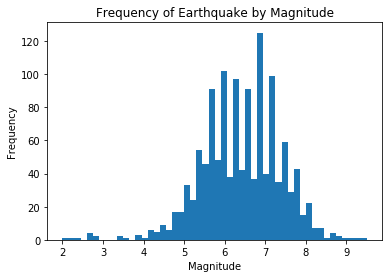

In [227]:
cleaned_df.Magnitude.plot('hist', bins=50)
plt.xlabel('Magnitude')
plt.title('Frequency of Earthquake by Magnitude');

In [228]:
# defining magnitude class
def magnitude_scale(column):
    if column['Magnitude']<=5:
        val='Light'
    elif column['Magnitude']<=6:
        val='Moderate'
    elif column['Magnitude']<=7:
        val='Strong'
    else:
        val='Major'
    return val

In [229]:
cleaned_df.sort_values('Deaths',ascending=False)[:20]


,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year
542,1976-07-27 19:42:00,China,39.605,117.888,16.7,7.6,NaN,655237.0,655237.0,655237.0,1976
1177,2004-12-26 00:58:00,Indonesia,3.287,95.972,30.0,9.1,"T,L",NaN,297200.0,297200.0,2004
86,1920-12-16 12:05:00,China,36.601,105.317,25.0,8.6,NaN,NaN,NaN,235502.0,1920
1261,2010-01-12 17:00:00,Haiti,18.457,-72.533,13.0,7.0,NaN,NaN,NaN,222517.0,2010
118,1927-05-22 22:32:00,China,37.386,102.311,25.0,7.9,NaN,NaN,NaN,200000.0,1927
97,1923-09-01 02:58:00,Japan,35.405,139.084,35.0,7.9,"T,F",NaN,NaN,143000.0,1923
271,1948-10-05 20:12:00,Turkmenistan,37.500,58.000,0.0,7.2,NaN,NaN,NaN,110000.0,1948
1245,2008-05-12 06:28:00,China,31.002,103.322,19.0,7.9,L,69195.0,88287.0,88287.0,2008
1192,2005-10-08 03:50:00,Pakistan,34.465,73.584,23.1,7.6,"L,Lq",87351.0,87351.0,87351.0,2005
35,1908-12-28 04:20:00,Italy,38.000,15.500,0.0,7.2,T,NaN,NaN,82000.0,1908


In [263]:
cleaned_df['Magnitude_Classes']=cleaned_df.apply(magnitude_scale,axis=1)

In [264]:
#cleaned_df['Magnitude_Classes'].value_counts(dropna=False)

In [265]:
#cleaned_df.groupby(['Country','Magnitude'])[['Deaths']].mean().sort_values(by='Deaths',ascending=False)

In [266]:
#cleaned_df=cleaned_df.sort_values('Magnitude', ascending=False)

In [267]:
#light=cleaned_df[cleaned_df.Magnitude_Classes=='Light']


In [268]:
#light.groupby(['Country','Magnitude_Classes','Deaths'])['Deaths'].count().sort_values(ascending=False)

In [269]:
cleaned_df['Magnitude'].corr(cleaned_df['Deaths'])

0.1397039362639968

In [270]:
cleaned_df.head()

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year,Magnitude_Classes
0,1900-07-12 06:25:00,Turkey,40.3,43.1,NaN,5.9,NaN,NaN,NaN,140.0,1900,Moderate
1,1901-03-31 07:11:00,Bulgaria,43.4,28.7,NaN,6.4,NaN,NaN,NaN,4.0,1901,Strong
2,1901-11-15 20:15:00,New Zealand,-43.0,173.0,0.0,6.8,NaN,NaN,NaN,1.0,1901,Strong
3,1902-01-30 14:01:00,Japan,40.5,141.3,35.0,6.9,NaN,NaN,NaN,1.0,1902,Strong
4,1902-02-13 09:39:00,Azerbaijan,40.7,48.6,15.0,6.9,NaN,NaN,NaN,86.0,1902,Strong


In [271]:
#Checking details for index number 896
#cleaned_df.loc[[896]]

In [272]:
# cleaned_df[cleaned_df.Magnitude_Classes=='Major'].plot()
# plt.xlabel('Deaths')
# plt.ylabel('Magnitude')
# plt.title('Magnitude of Earthquake by Country');

In [273]:
#test =cleaned_df[cleaned_df.Magnitude_Classes]

## Magnitude and Depth

In [274]:
cleaned_depth_df=pd.read_csv('data/earthquake.csv')

In [275]:
cleaned_depth_df=cleaned_df[cleaned_df['Depth_(km)'].notnull()]

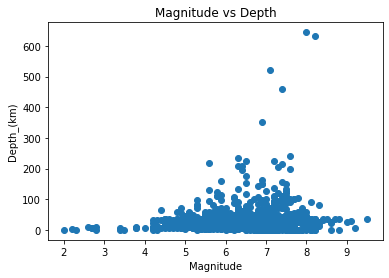

In [276]:
plt.scatter(cleaned_depth_df["Magnitude"],cleaned_depth_df["Depth_(km)"])
plt.xlabel("Magnitude")
plt.ylabel("Depth_(km)")
plt.title("Magnitude vs Depth")
plt.show()

In [277]:
# geoplot.choropleth(
#     world, hue=cleaned_df['Depth_(km)'],
#     cmap='coolwarm', legend =True,figsize=(15, 10));

In [278]:
np.corrcoef(cleaned_depth_df["Deaths"], cleaned_depth_df["Depth_(km)"])

array([[ 1.        , -0.02241636],
       [-0.02241636,  1.        ]])

# Secondary Effect

In [279]:
#df secondary effect
secondary_effect=cleaned_df[cleaned_df['Deaths']!=0]

In [280]:
#dropping null from secondary effect sorting by total deaths and selecting top 10
secondary_effect=secondary_effect[secondary_effect[ 'Secondary_Effects'].notnull()].sort_values('Deaths',ascending=False)
secondary_effect.head()

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year,Magnitude_Classes
1177,2004-12-26 00:58:00,Indonesia,3.287,95.972,30.0,9.1,"T,L",NaN,297200.0,297200.0,2004,Major
97,1923-09-01 02:58:00,Japan,35.405,139.084,35.0,7.9,"T,F",NaN,NaN,143000.0,1923,Major
1245,2008-05-12 06:28:00,China,31.002,103.322,19.0,7.9,L,69195.0,88287.0,88287.0,2008,Major
1192,2005-10-08 03:50:00,Pakistan,34.465,73.584,23.1,7.6,"L,Lq",87351.0,87351.0,87351.0,2005,Major
35,1908-12-28 04:20:00,Italy,38.000,15.500,0.0,7.2,T,NaN,NaN,82000.0,1908,Major


In [281]:
# Creating secondary death column 
secondary_effect['secondary_deaths']=secondary_effect['PDE_Total_Deaths']-secondary_effect['PDE_Shaking_Deaths']
secondary_effect.head()

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year,Magnitude_Classes,secondary_deaths
1177,2004-12-26 00:58:00,Indonesia,3.287,95.972,30.0,9.1,"T,L",NaN,297200.0,297200.0,2004,Major,NaN
97,1923-09-01 02:58:00,Japan,35.405,139.084,35.0,7.9,"T,F",NaN,NaN,143000.0,1923,Major,NaN
1245,2008-05-12 06:28:00,China,31.002,103.322,19.0,7.9,L,69195.0,88287.0,88287.0,2008,Major,19092.0
1192,2005-10-08 03:50:00,Pakistan,34.465,73.584,23.1,7.6,"L,Lq",87351.0,87351.0,87351.0,2005,Major,0.0
35,1908-12-28 04:20:00,Italy,38.000,15.500,0.0,7.2,T,NaN,NaN,82000.0,1908,Major,NaN


In [282]:
# getting count of individual countries, sorting and giving new column name
secondary_effect_country=secondary_effect.groupby('Country').size().sort_values(ascending=False)\
                         .reset_index(name='Eartquake per Country')
secondary_effect_country
#Another way to do this
#secondary_effect.Country.value_counts().reset_index(name='Eartquake per Country')

,Country,Eartquake per Country
0,Japan,43
1,Indonesia,40
2,Chile,23
3,Mexico,19
4,Peru,17
5,Philippines,15
6,Taiwan,15
7,United States,14
8,China,13
9,Iran,13


In [283]:
secondary_effect_top=secondary_effect.head(10)

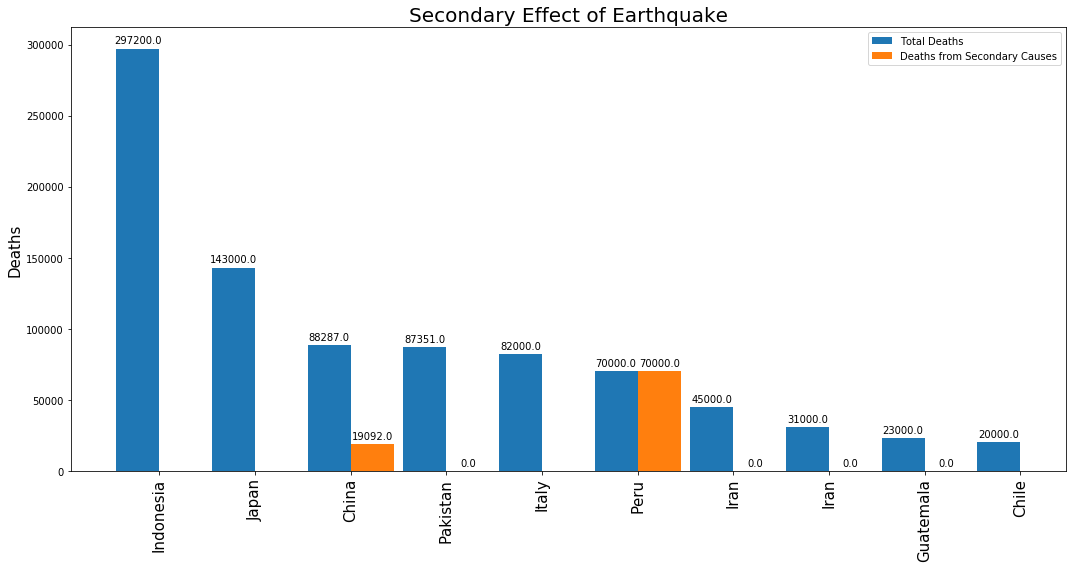

In [284]:
labels = secondary_effect_top.Country
Deaths = secondary_effect_top.Deaths
secondary_deaths = secondary_effect_top.secondary_deaths
#secondary_deathp= secondary_effect_top.secondary_deathp
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, Deaths, width, label='Total Deaths',)
rects2 = ax.bar(x + width/2, secondary_deaths, width, label='Deaths from Secondary Causes')
#rects3 = ax.bar(x+width/2,secondary_deathp,width , label = 'Percentage')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Deaths',fontsize = 15)
ax.set_title('Secondary Effect of Earthquake', fontsize= 20)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=15,rotation=90)

ax.legend()
def autolabel(rects):
  """Attach a text label above each bar in rects, displaying its height."""
  for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width()/2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)
fig.tight_layout();
plt.show();
#plt.savefig('MemoryUsg.png', dpi = 250);

In [285]:
data=secondary_effect_top

fig=px.bar(data, x='Country',y='Deaths',color='Deaths',
          labels={'Country','Deaths'})
fig.update_layout(title='Deaths with Secondary Effects')


In [286]:
secondary_effect['Secondary_Effects']=secondary_effect['Secondary_Effects'].str.replace(',',"")

In [287]:
secondary_effect.head()

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year,Magnitude_Classes,secondary_deaths
1177,2004-12-26 00:58:00,Indonesia,3.287,95.972,30.0,9.1,TL,NaN,297200.0,297200.0,2004,Major,NaN
97,1923-09-01 02:58:00,Japan,35.405,139.084,35.0,7.9,TF,NaN,NaN,143000.0,1923,Major,NaN
1245,2008-05-12 06:28:00,China,31.002,103.322,19.0,7.9,L,69195.0,88287.0,88287.0,2008,Major,19092.0
1192,2005-10-08 03:50:00,Pakistan,34.465,73.584,23.1,7.6,LLq,87351.0,87351.0,87351.0,2005,Major,0.0
35,1908-12-28 04:20:00,Italy,38.000,15.500,0.0,7.2,T,NaN,NaN,82000.0,1908,Major,NaN


In [288]:
secondary_effect.head()  

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year,Magnitude_Classes,secondary_deaths
1177,2004-12-26 00:58:00,Indonesia,3.287,95.972,30.0,9.1,TL,NaN,297200.0,297200.0,2004,Major,NaN
97,1923-09-01 02:58:00,Japan,35.405,139.084,35.0,7.9,TF,NaN,NaN,143000.0,1923,Major,NaN
1245,2008-05-12 06:28:00,China,31.002,103.322,19.0,7.9,L,69195.0,88287.0,88287.0,2008,Major,19092.0
1192,2005-10-08 03:50:00,Pakistan,34.465,73.584,23.1,7.6,LLq,87351.0,87351.0,87351.0,2005,Major,0.0
35,1908-12-28 04:20:00,Italy,38.000,15.500,0.0,7.2,T,NaN,NaN,82000.0,1908,Major,NaN


In [289]:
# droppping null from secondary deaths
secondary_effect['Secondary_Effects'].unique()

array(['TL', 'TF', 'L', 'LLq', 'T', 'LFLq', 'F', 'TLLq', 'Lq', 'TLF',
       'TLq', 'LF'], dtype=object)

In [290]:
# Renaming secondary effects and creating new columns(get_dummies())
secondary_effect['Secondary_Effects']=secondary_effect['Secondary_Effects'].replace({'TL':'T,L', 'TF': 'T,F','LLq':'L,Lq', 'LFLq':'L,F,Lq','TLLq':'T,L,Lq','TLF':'T,L,F','TLq':'T,Lq','LF':'L,F'})                                                                
                                                                                

In [291]:
secondary_effect.join(secondary_effect['Secondary_Effects'].str.get_dummies(','))

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year,Magnitude_Classes,secondary_deaths,F,L,Lq,T
1177,2004-12-26 00:58:00,Indonesia,3.287,95.972,30.0,9.1,"T,L",NaN,297200.0,297200.0,2004,Major,NaN,0,1,0,1
97,1923-09-01 02:58:00,Japan,35.405,139.084,35.0,7.9,"T,F",NaN,NaN,143000.0,1923,Major,NaN,1,0,0,1
1245,2008-05-12 06:28:00,China,31.002,103.322,19.0,7.9,L,69195.0,88287.0,88287.0,2008,Major,19092.0,0,1,0,0
1192,2005-10-08 03:50:00,Pakistan,34.465,73.584,23.1,7.6,"L,Lq",87351.0,87351.0,87351.0,2005,Major,0.0,0,1,1,0
35,1908-12-28 04:20:00,Italy,38.000,15.500,0.0,7.2,T,NaN,NaN,82000.0,1908,Major,NaN,0,0,0,1
460,1970-05-31 20:23:00,Peru,-9.248,-78.840,73.0,7.9,L,0.0,70000.0,70000.0,1970,Major,70000.0,0,1,0,0
825,1990-06-20 21:00:00,Iran,37.001,49.216,17.9,7.4,L,45000.0,45000.0,45000.0,1990,Major,0.0,0,1,0,0
1149,2003-12-26 01:56:00,Iran,28.950,58.268,6.0,6.6,L,31000.0,31000.0,31000.0,2003,Strong,0.0,0,1,0,0
525,1976-02-04 09:01:00,Guatemala,15.296,-89.145,12.3,7.5,T,23000.0,23000.0,23000.0,1976,Major,0.0,0,0,0,1
27,1906-08-17 00:40:00,Chile,-33.000,-72.000,0.0,8.2,T,NaN,NaN,20000.0,1906,Major,NaN,0,0,0,1


In [292]:
qmap_df=secondary_effect.copy()
qmap_df.head()

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year,Magnitude_Classes,secondary_deaths
1177,2004-12-26 00:58:00,Indonesia,3.287,95.972,30.0,9.1,"T,L",NaN,297200.0,297200.0,2004,Major,NaN
97,1923-09-01 02:58:00,Japan,35.405,139.084,35.0,7.9,"T,F",NaN,NaN,143000.0,1923,Major,NaN
1245,2008-05-12 06:28:00,China,31.002,103.322,19.0,7.9,L,69195.0,88287.0,88287.0,2008,Major,19092.0
1192,2005-10-08 03:50:00,Pakistan,34.465,73.584,23.1,7.6,"L,Lq",87351.0,87351.0,87351.0,2005,Major,0.0
35,1908-12-28 04:20:00,Italy,38.000,15.500,0.0,7.2,T,NaN,NaN,82000.0,1908,Major,NaN


In [293]:
qmap_df.columns


Index(['Date', 'Country', 'Lat', 'Long', 'Depth_(km)', 'Magnitude',
       'Secondary_Effects', 'PDE_Shaking_Deaths', 'PDE_Total_Deaths', 'Deaths',
       'Year', 'Magnitude_Classes', 'secondary_deaths'],
      dtype='object')

In [294]:
#drop lots of columns
qmap_df= qmap_df.drop(columns= ['Year','PDE_Total_Deaths','PDE_Shaking_Deaths','Secondary_Effects','secondary_deaths'])
#drop NaN values 
#df.dropna()
qmap_df=qmap_df.dropna()


In [295]:
#exporting the file
qmap_cleaned_df=qmap_df.to_csv('data/qmap_cleaned_df.csv',index=None)

In [296]:
secondary_maps=pd.read_csv('data/qmap_cleaned_df.csv')

In [297]:
secondary_maps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 8 columns):
Date                 352 non-null object
Country              352 non-null object
Lat                  352 non-null float64
Long                 352 non-null float64
Depth_(km)           352 non-null float64
Magnitude            352 non-null float64
Deaths               352 non-null float64
Magnitude_Classes    352 non-null object
dtypes: float64(5), object(3)
memory usage: 22.1+ KB


In [298]:
secondary_maps['geometry']=secondary_maps.apply(lambda row: Point(row['Long'],row['Lat']),axis=1)

In [299]:
secondary_maps=gpd.GeoDataFrame(secondary_maps, geometry='geometry')

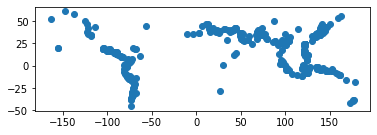

In [300]:
secondary_maps[(secondary_maps['Deaths']>0)].plot();

In [301]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [302]:
#geoplot.polyplot(world, figsize=(15, 10));

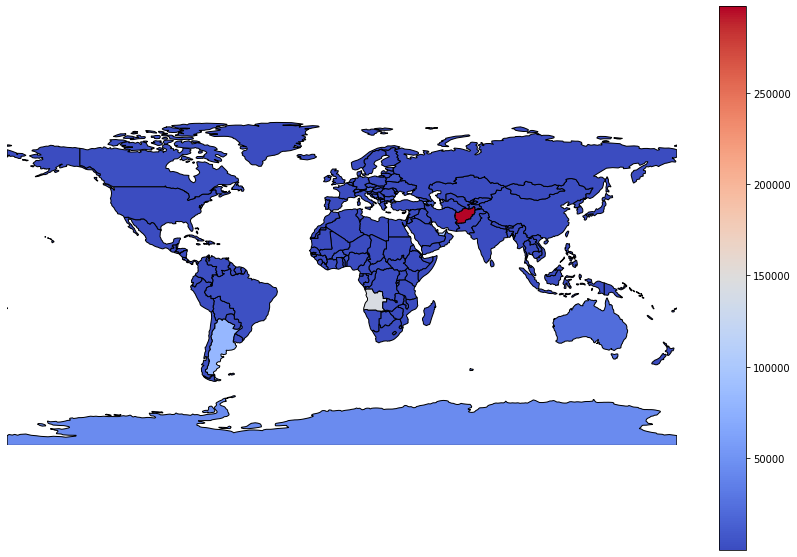

In [303]:
geoplot.choropleth(
    world, hue=secondary_maps['Deaths'],
    cmap='coolwarm', legend =True,figsize=(15, 10));

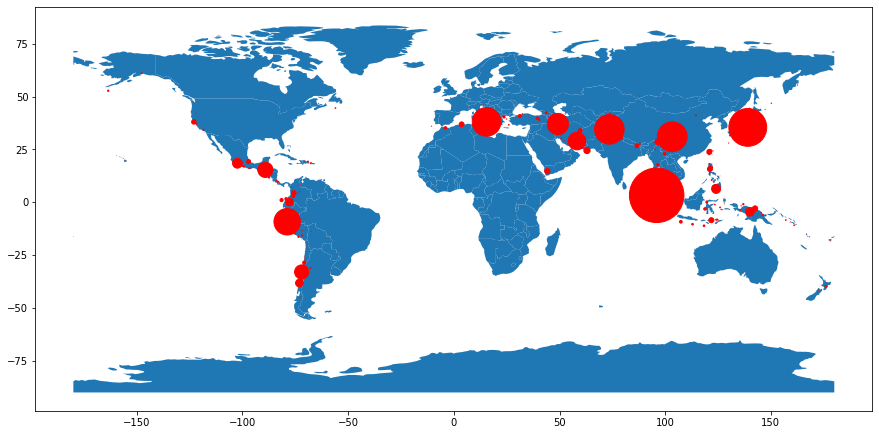

In [328]:
fig,ax =plt.subplots(figsize=(15,10))
world.plot(ax=ax)
secondary_maps[(secondary_maps['Deaths']>0)].plot(ax=ax,color='red', markersize=secondary_maps['Deaths']/100);


In [305]:
secondary_effect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 1177 to 955
Data columns (total 13 columns):
Date                  358 non-null object
Country               358 non-null object
Lat                   355 non-null float64
Long                  355 non-null float64
Depth_(km)            352 non-null float64
Magnitude             358 non-null float64
Secondary_Effects     358 non-null object
PDE_Shaking_Deaths    237 non-null float64
PDE_Total_Deaths      248 non-null float64
Deaths                358 non-null float64
Year                  358 non-null int64
Magnitude_Classes     358 non-null object
secondary_deaths      236 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 49.2+ KB


In [306]:
# To capture places with secondary death(to omit places with 0 secondary death) based on PDE data
secondary_effect_death=secondary_effect[secondary_effect['secondary_deaths']!=0].sort_values('secondary_deaths',ascending=False)



In [307]:
secondary_effect_death.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 460 to 394
Data columns (total 13 columns):
Date                  194 non-null object
Country               194 non-null object
Lat                   191 non-null float64
Long                  191 non-null float64
Depth_(km)            188 non-null float64
Magnitude             194 non-null float64
Secondary_Effects     194 non-null object
PDE_Shaking_Deaths    73 non-null float64
PDE_Total_Deaths      84 non-null float64
Deaths                194 non-null float64
Year                  194 non-null int64
Magnitude_Classes     194 non-null object
secondary_deaths      72 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 21.2+ KB


In [308]:
#calculating percent 
def percent_columns(x,y):
    """calculating percentage from two columns"""
    return (y/x)*100

In [309]:
#calculating secondary death percentage
secondary_effect_death['secondary_deathp']=secondary_effect_death.apply(lambda row:percent_columns(row['PDE_Total_Deaths'],row['secondary_deaths']),axis=1).round()
                                
secondary_effect_death.head()

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year,Magnitude_Classes,secondary_deaths,secondary_deathp
460,1970-05-31 20:23:00,Peru,-9.248,-78.840,73.0,7.9,L,0.0,70000.0,70000.0,1970,Major,70000.0,100.0
1245,2008-05-12 06:28:00,China,31.002,103.322,19.0,7.9,L,69195.0,88287.0,88287.0,2008,Major,19092.0,22.0
538,1976-06-25 19:18:00,Indonesia,-4.531,140.109,15.0,7.1,L,422.0,7422.0,7422.0,1976,Major,7000.0,94.0
751,1987-03-06 04:10:00,Ecuador,0.082,-77.787,17.1,7.1,L,1000.0,5000.0,5000.0,1987,Major,4000.0,80.0
1004,1998-07-17 08:49:00,Papua New Guinea,-2.946,142.520,23.0,7.0,T,0.0,2683.0,2700.0,1998,Strong,2683.0,100.0


In [310]:
#secondary_effect_death.sort_index()

In [311]:
secondary_effect_death['Magnitude'].corr(secondary_effect_death['Deaths'])

0.1938161220550846

In [312]:
#secondary_effect.groupby(['Country','Magnitude_Classes','Deaths'])['Deaths'].count().sort_values(ascending=False)

In [313]:
#Top ten
secondary_effect_ten= secondary_effect_death.head(10)

In [314]:
secondary_effect_ten

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year,Magnitude_Classes,secondary_deaths,secondary_deathp
460,1970-05-31 20:23:00,Peru,-9.248,-78.840,73.0,7.9,L,0.0,70000.0,70000.0,1970,Major,70000.0,100.0
1245,2008-05-12 06:28:00,China,31.002,103.322,19.0,7.9,L,69195.0,88287.0,88287.0,2008,Major,19092.0,22.0
538,1976-06-25 19:18:00,Indonesia,-4.531,140.109,15.0,7.1,L,422.0,7422.0,7422.0,1976,Major,7000.0,94.0
751,1987-03-06 04:10:00,Ecuador,0.082,-77.787,17.1,7.1,L,1000.0,5000.0,5000.0,1987,Major,4000.0,80.0
1004,1998-07-17 08:49:00,Papua New Guinea,-2.946,142.520,23.0,7.0,T,0.0,2683.0,2700.0,1998,Strong,2683.0,100.0
1212,2006-07-17 08:19:00,Indonesia,-9.254,107.411,34.0,7.7,T,0.0,730.0,730.0,2006,Major,730.0,100.0
1014,1999-01-25 18:19:00,Colombia,4.444,-75.659,17.0,6.1,L,1185.0,1885.0,1900.0,1999,Strong,700.0,37.0
1072,2001-01-13 17:33:00,El Salvador,13.076,-88.702,38.0,7.6,L,267.0,852.0,852.0,2001,Major,585.0,69.0
920,1994-06-06 20:47:00,Colombia,2.908,-75.971,12.0,6.8,L,295.0,795.0,800.0,1994,Strong,500.0,63.0
1097,2002-03-03 12:08:00,Afghanistan,36.508,70.503,204.0,7.3,L,16.0,166.0,166.0,2002,Major,150.0,90.0


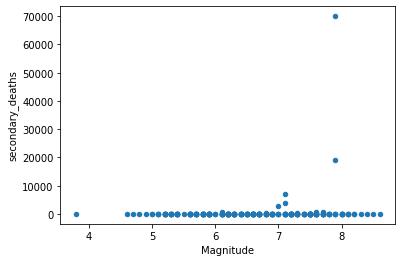

In [315]:
secondary_effect.plot(x='Magnitude', y = 'secondary_deaths',  kind = 'scatter');

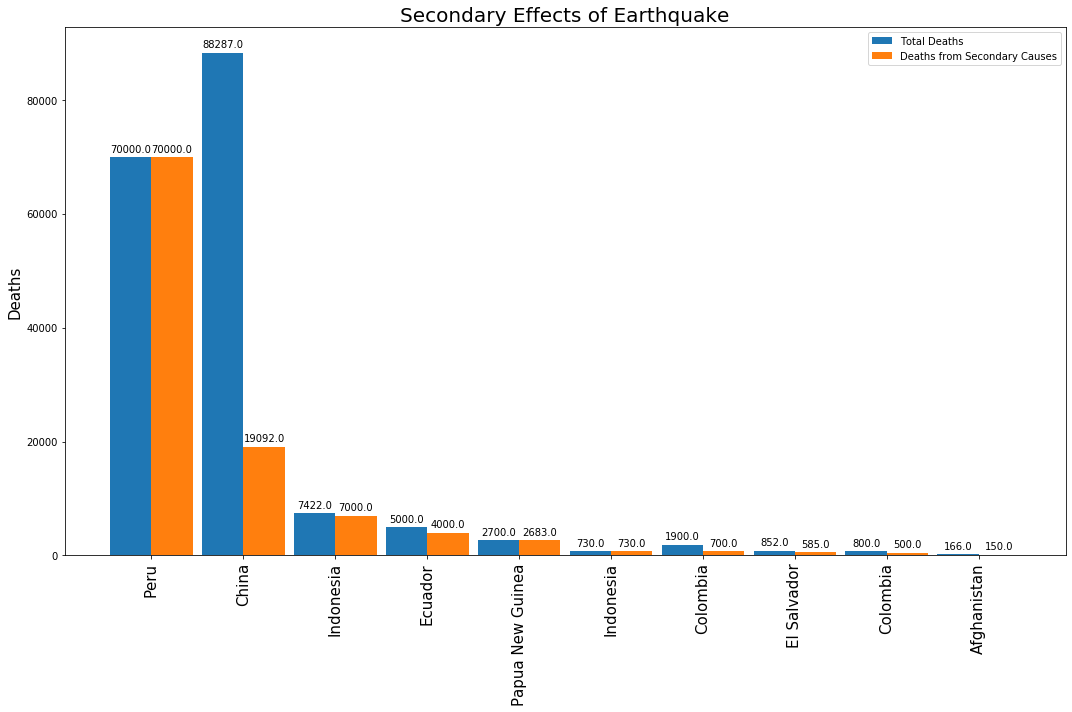

In [316]:
labels = secondary_effect_ten.Country
Deaths = secondary_effect_ten.Deaths
secondary_deaths = secondary_effect_ten.secondary_deaths
#secondary_deathp= secondary_effect_ten.secondary_deathp #(third label for percentage)
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, Deaths, width, label='Total Deaths',)
rects2 = ax.bar(x + width/2, secondary_deaths, width, label='Deaths from Secondary Causes')
#rects3 = ax.bar(x+width/2,secondary_deathp,width , label = 'Percentage')  #third label for percentage
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Deaths', fontsize=15)
ax.set_title('Secondary Effects of Earthquake', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=15,rotation=90)

ax.legend()
def autolabel(rects):
  """Attach a text label above each bar in rects, displaying its height."""
  for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width()/2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)  #third label for percentage
fig.tight_layout();
plt.show();
#plt.savefig('MemoryUsg.png', dpi = 250);

In [317]:
url='https://earthquake.usgs.gov/fdsnws/event/1/'

In [318]:
payload = {'format': 'csv'}
           

In [319]:
r = requests.get(url=url, params=payload)

In [320]:
print(r.url)

https://earthquake.usgs.gov/fdsnws/event/1/?format=csv


In [321]:
r.status_code

200

In [322]:
#First, we can read the text into a DataFrame using read_csv
#Another way to make it work is to pass the url itself to read_csv.
tn_earthquake = pd.read_csv(r.url)
eq.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


In [ ]:
tn_earthquake = pd.read_csv(StringIO(r.text))
tn_earthquake.head()